<a href="https://colab.research.google.com/github/Chandrashekar0123/Lerno-ML-case-study/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [4]:
#Read the datasets
dataset=pd.read_csv("weight-height.csv")


In [5]:
#Check the dataset
dataset.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:

#check if null values is present in dataset or not.....
dataset.isnull().sum()


,0
Gender,0
Height,0
Weight,0


In [7]:
#Checking the dimensions of the dataset
dataset.shape


(10000, 3)

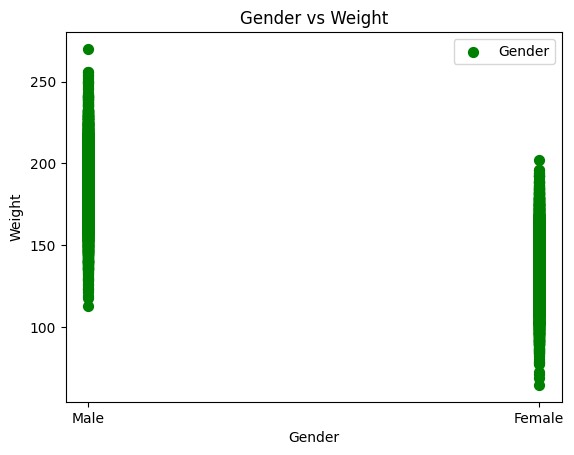

In [8]:
#Plot Gender vs Weight............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, 2].values
plt.scatter(x1,y1,label='Gender',color='Green',s=50)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Gender vs Weight')
plt.legend()
plt.show()

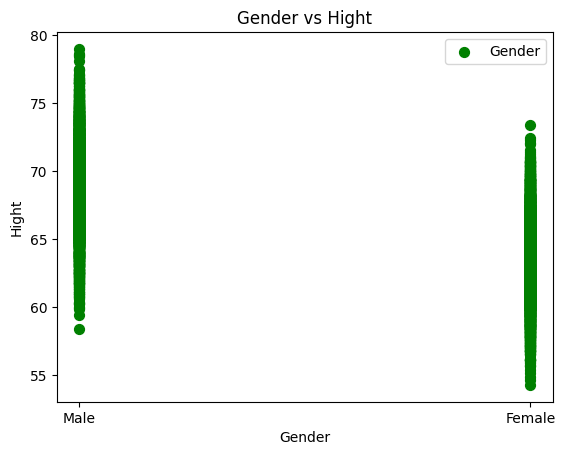

In [9]:
#Plot Gender vs Hight............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, 1].values
plt.scatter(x1,y1,label='Gender',color='Green',s=50)
plt.xlabel('Gender')
plt.ylabel('Hight')
plt.title('Gender vs Hight')
plt.legend()
plt.show()



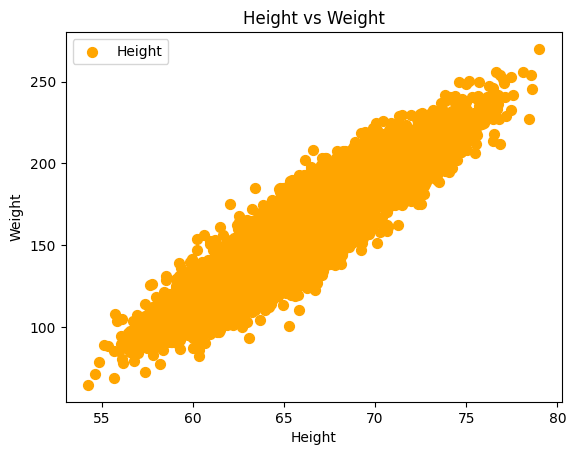

In [25]:
#Plot Height vs Weight............
x2 = dataset.iloc[:, 1].values
y2 = dataset.iloc[:, 2].values
plt.scatter(x2,y2,label='Height',color='Orange',s=50)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.legend()

In [12]:
#separating the dependent and independent values....
#X-Independent variable
X = dataset.iloc[:, 1:2].values
print(X)


[[73.84701702]
 [68.78190405]
 [74.11010539]
 ...
 [63.86799221]
 [69.03424313]
 [61.94424588]]


In [13]:
#y-dependent or target variable
y = dataset.iloc[:, 2].values
print(y)

[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]


In [14]:
Heightmin=X.min()
Heightmax=X.max()
Heightnorm=(X-Heightmin)/(Heightmax-Heightmin)
Weightmin=y.min()
Weightmax=y.max()
Weightnorm=(y-Weightmin)/(Weightmax-Weightmin)


In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#predicting the test set
y_pred = regressor.predict(X_test)


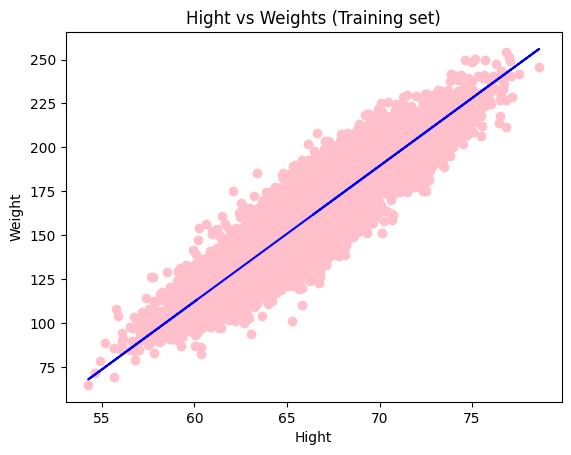

In [17]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Pink')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()


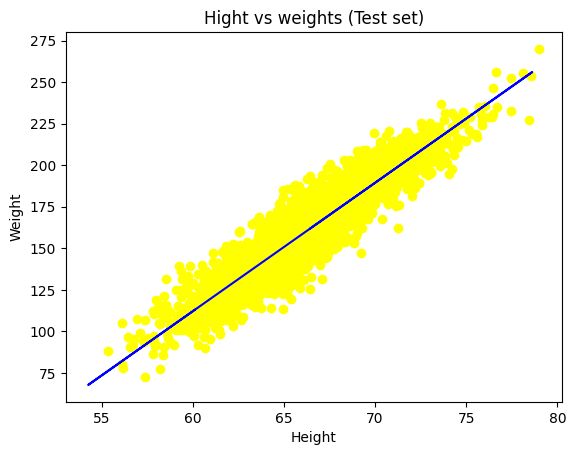

In [18]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

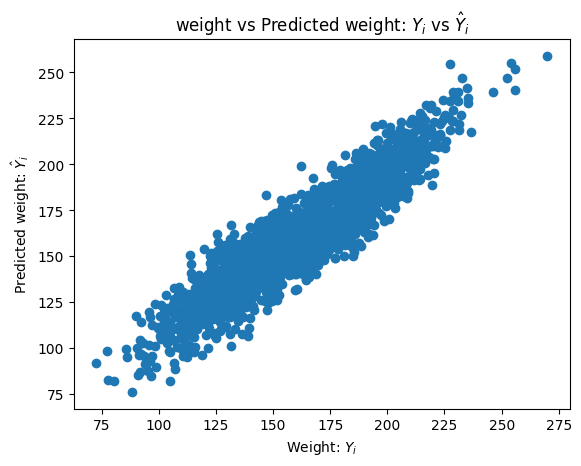

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Weight: $Y_i$")
plt.ylabel("Predicted weight: $\hat{Y}_i$")
plt.title("weight vs Predicted weight: $Y_i$ vs $\hat{Y}_i$")
plt.show()


In [20]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))


Coefficients:  [7.72896259]
Mean squared error: 143.23
Variance score: 0.86


In [21]:
knownvalue=float(input("Enter the value of hight:"))
findvalue=regressor.predict([[knownvalue]])

Enter the value of hight:68


In [22]:
print("when the height value is",knownvalue,"that moment weight value is",findvalue)


when the height value is 68.0 that moment weight value is [173.97262392]


In [23]:
dataset["predicted_value"]=regressor.predict(X)
dataset.head()


,Gender,Height,Weight,predicted_value
0,Male,73.847017,241.893563,219.164000
1,Male,68.781904,162.310473,180.015931
2,Male,74.110105,212.740856,221.197400
3,Male,71.730978,220.042470,202.809216
4,Male,69.881796,206.349801,188.516954


In [24]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print("r2_score value is :",r2)

r2_score value is : 0.8649031737206692
